In [44]:
# DB_PATH = './data/dbpedia_part/db/'
DB_PATH = './data/dbpedia_part/db_infloc/'
# DB_PATH = './data/dbpedia_subset/db/'
DATA_PATH = './results/8sep-ft1-bp2-nolcwa'
import trident
trident.setLoggingLevel(0)
g = trident.Db(DB_PATH)
type_id = g.lookup_id('<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>')
assert type_id != None
print('%d terms, %d triples' % (g.n_terms(), g.n_triples()))

31988193 terms, 109490101 triples


In [47]:
e = g.lookup_id('<http://dbpedia.org/resource/St._Joseph\'s_Hospital,_Dublin>')
for p,o in g.po(e):
    print('%50s %50s' % (g.lookup_str(p),g.lookup_str(o)))

                <http://purl.org/dc/terms/subject> <http://dbpedia.org/resource/Category:Hospitals_affiliated_with_the_Roman_Catholic_Church>
                <http://purl.org/dc/terms/subject> <http://dbpedia.org/resource/Category:Hospitals_established_in_1958>
                <http://purl.org/dc/terms/subject> <http://dbpedia.org/resource/Category:Hospitals_in_Dublin_(city)>
                <http://purl.org/dc/terms/subject>      <http://dbpedia.org/resource/Category:Raheny>
      <http://www.w3.org/2000/01/rdf-schema#label>                 "St. Joseph's Hospital, Dublin"@en


In [38]:
!ls -lSh $DATA_PATH/sims/ | head

total 11G
-rw-r--r-- 1 kruit da  468M Sep  8 20:16 53822652_0_5767892317858575530.csv.tsv
-rw-r--r-- 1 kruit da  431M Sep  8 20:20 88523363_0_8180214313099580515.csv.tsv
-rw-r--r-- 1 kruit da  424M Sep  8 20:23 19272019_0_1508498249156534553.csv.tsv
-rw-r--r-- 1 kruit da  388M Sep  8 20:11 18422942_0_3659164506677528063.csv.tsv
-rw-r--r-- 1 kruit da  354M Sep  8 20:14 47709681_0_4437772923903322343.csv.tsv
-rw-r--r-- 1 kruit da  353M Sep  8 20:17 73988811_0_2775758476756716904.csv.tsv
-rw-r--r-- 1 kruit da  337M Sep  8 20:23 37856682_0_6818907050314633217.csv.tsv
-rw-r--r-- 1 kruit da  328M Sep  8 20:14 13719111_1_5719401842463579519.csv.tsv
-rw-r--r-- 1 kruit da  306M Sep  8 20:15 22864497_0_8632623712684511496.csv.tsv
ls: write error: Broken pipe


In [39]:
import os
# table = '42764224_0_515744189130384109.csv' # danish politics
table = '36102169_0_7739454799295072814.csv' # video games
table = '33167985_0_5220049369716352813.csv' # mammals
table = '73242003_5_4847571983313033360.csv' # video games (small)
table = '43226272_0_5995103035300388365.csv' # irish hospitals
table = '86627271_6_2239821927452848323.csv' # lakes

simfile = DATA_PATH + '/sims/%s.tsv' % table
assert os.path.exists(simfile)

In [40]:
import pandas as pd
results = pd.concat([pd.read_csv(os.path.join(DATA_PATH+'/instance/',fname)) for fname in os.listdir(DATA_PATH+'/instance/')])
results = results[results.table == table]
results['rownr'] = results.row.map(lambda r: int(r.split('~Row')[1]))
pred = dict(zip(results.id,(results.simscore == results.groupby('row').simscore.transform('max'))))
gold = dict(zip(results.id,(results.gold == results.groupby('row').gold.transform('max'))))
strscore = dict(zip(results.id, results.groupby('id').strscore.transform('max')))
n_feats = dict(zip(results.id, results.n_feats))
row_content = dict(zip(results.rownr, results.rowcontent))
row_gold = {r:e for r,e,isgold in zip(results.rownr, results.id, results.gold) if isgold}
results.sort_values('row').head()

,Unnamed: 0,row,entity,gold,table,id,rowcontent,score,rownr,name,strscore,simscore,n_feats,strscore_numer,strscore_denom,coherence,sim
2,2,86627271_6_2239821927452848323.csv~Row0,http://dbpedia.org/resource/Nettilling_Lake,True,86627271_6_2239821927452848323.csv,26173110,nettilling lake|5063|5542|30,0.750002,0,Nettilling_Lake,0.0,0.0,41,0.0,0.0,0.0,0.0
112,112,86627271_6_2239821927452848323.csv~Row0,http://dbpedia.org/resource/Lake_Laka,False,86627271_6_2239821927452848323.csv,24231379,nettilling lake|5063|5542|30,0.249998,0,Lake_Laka,0.0,0.0,32,0.0,0.0,0.0,0.0
81,81,86627271_6_2239821927452848323.csv~Row1,http://dbpedia.org/resource/Lake_Laka,False,86627271_6_2239821927452848323.csv,24231379,dubawnt lake|3629|3833|236,0.199999,1,Lake_Laka,0.0,0.0,32,0.0,0.0,0.0,0.0
16,16,86627271_6_2239821927452848323.csv~Row1,http://dbpedia.org/resource/Dubawnt_Lake,True,86627271_6_2239821927452848323.csv,20592507,dubawnt lake|3629|3833|236,0.600002,1,Dubawnt_Lake,0.0,0.0,35,0.0,0.0,0.0,0.0
78,78,86627271_6_2239821927452848323.csv~Row1,http://dbpedia.org/resource/Lago_delle_Lame,False,86627271_6_2239821927452848323.csv,24220295,dubawnt lake|3629|3833|236,0.199999,1,Lago_delle_Lame,0.0,0.0,31,0.0,0.0,0.0,0.0


AP = 0.17391304347826086


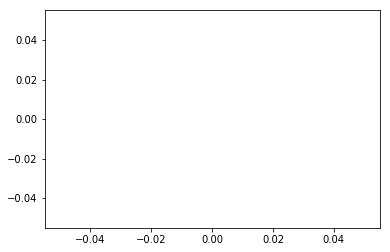

In [41]:
p = (results.simscore == results.groupby('row').simscore.transform('max'))
y_test, y_score = results.gold[p], results.simscore[p]

from sklearn.metrics import average_precision_score
print('AP = %s' % average_precision_score(y_test, y_score) )

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
p_curve, r_curve, _ = precision_recall_curve(y_test, y_score)
plt.step(r_curve[1:-1], p_curve[1:-1], where='post')    

AP = 0.17391304347826086


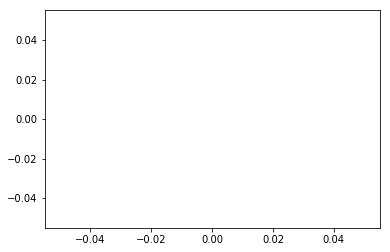

In [42]:
p = (results.strscore == results.groupby('row').strscore.transform('max'))
y_test, y_score = results.gold[p], results.strscore[p]

from sklearn.metrics import average_precision_score
print('AP = %s' % average_precision_score(y_test, y_score) )

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
p_curve, r_curve, _ = precision_recall_curve(y_test, y_score)
plt.step(r_curve[1:-1], p_curve[1:-1], where='post')    

In [43]:
!wc -l $simfile

0 ./results/8sep-ft1-bp2-nolcwa/sims/86627271_6_2239821927452848323.csv.tsv


In [7]:
import math
sim = {}
for line in open(simfile):
    e1,e2,s = line.strip().split('\t')
    sim[(int(e1),int(e2))] = math.exp(-float(s))
    sim[(int(e2),int(e1))] = math.exp(-float(s))
m = max(sim.values())
sim = {k:0.5*(v/m) for k,v in sim.items()}

ValueError: max() arg is an empty sequence

In [ ]:
from collections import Counter
es = Counter(tuple(zip(*sim))[0]) + Counter(tuple(zip(*sim))[1])
es = Counter({e:c for e,c in es.items() if strscore.get(e,0)>0})
print('%d entities' % len(es))
n = len(es)
e_i = {e:i for i,(e,_) in enumerate(es.most_common(n))}
i_e = {i:e for i,(e,_) in enumerate(es.most_common(n))}
name = lambda e: ((g.lookup_str(e) or '').split('/')[-1][:-1])
for e,n in es.most_common(3):
    print(name(e))

In [ ]:
%%time
import scipy.sparse
data, i, j = zip(*[(s, e_i[e1], e_i[e2]) for (e1,e2),s in sim.items() if e1 in e_i and e2 in e_i if e1!=e2 if s>0])
D = scipy.sparse.coo_matrix((data, (i, j)), shape=(len(e_i), len(e_i)))
D

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE()
# X = tsne.fit_transform(D.toarray())
X = tsne.fit_transform(scipy.log1p(D.todense()))
print(X.shape)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(*X.T)

In [ ]:
import pandas as pd
x, y = X.T
df = pd.DataFrame(dict(
    x=x,
    y=y,
    text=['%s (%d)' % ((g.lookup_str(i_e[i]) or '').split('/')[-1][:-1], n_feats[i_e[i]]) for i in range(len(X))],
    type=[(g.lookup_str(t) or '').split('/')[-1][:-1] 
          for i in range(len(X)) for t in [(g.o(i_e[i], type_id) or [-1])[0]]], 
    score=[strscore.get(i_e[i],0) for i in range(len(X))], 
    gold=[gold.get(i_e[i],False) for i in range(len(X))],
    pred=[pred.get(i_e[i],False) for i in range(len(X))]
)).sort_values(['pred','gold'], ascending=True)
df = df[df.score>0]

import plotly.offline
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
    "data": [
        {'x':df.x[df.type==t],
         'y':df.y[df.type==t],
         'text':df.text[df.type==t], 
         'marker': {
             'size':4+df.score[df.type==t]*20,
             'symbol':'circle',
             'line': {
                 'color':[('#0a0' if g and p else ('#a00' if p else ('#aa0' if g else '#000')))
                           for g,p in zip(df.gold[df.type==t],df.pred[df.type==t])],
                 'width':[4 if g or p else 0 for g,p in zip(df.gold[df.type==t],df.pred[df.type==t])]
             }
         },
         'name': t,
         'mode': 'markers'}
        for t in set(df.type)
    ],
    'layout': {'height':800, 'hovermode':'closest'}
})

# Belief Propagation

In [ ]:
row_e_p = {}
for e, r, s  in zip(results.id, results.row.map(lambda r: int(r.split('~Row')[1])), results.strscore):
    row_e_p.setdefault(r, {})[e] = s
print('%d rows' % len(row_e_p))
# row_e_p = {r:{e:es[e]/sum(es.values()) for e in es} for r,es in row_es.items()}

In [ ]:
# Prior distribution: string scores normalized by row (R * C)
data,i,j = zip(*((p, row, e_i[e]) for row,ep in row_e_p.items() for e,p in ep.items() if e in e_i))
P = scipy.sparse.coo_matrix((data,(i,j)),shape=(max(row_e_p)+1, len(es)))
P

In [ ]:
def get_dist(d):
    return sorted((d[0,i],name(i_e[i]), i) for i in d.nonzero()[1])[::-1]
def get_dist_rows(M):
    for r in range(M.shape[0]):
        d = get_dist(M.getrow(r))
        yield r, d, (row_gold.get(r,None) != i_e[d[0][2]] if d else False)
def show_dist_rows(M, n=3,m=3):
    for r,d,t in [(r,d,t) for r,d,t in get_dist_rows(M) if t][:m]:
        print( 'Row %d'%r, row_content.get(r,''), '(gold: %s [%d])'%(name(row_gold.get(r,-1)), e_i.get(row_gold.get(r,-1),-1)) )
        print('\t' + '\n\t'.join('%.2f %s [%d]'%c for c in d[:n]) )

show_dist_rows(P,m=5) # Prior

In [ ]:
import numpy as np
M = P
for _ in range( 1 ):
    K = np.array(scipy.log1p(M.dot(D).todense()).sum(axis=0))[0]
    K = K / K.max()
    M = scipy.sparse.coo_matrix(P.toarray()*K)

show_dist_rows(M, m=10) # one BP step

In [ ]:
results2 = results.merge(pd.DataFrame([(r,i_e[i],s) for r,i,s in zip(*M.nonzero(), M.data)], 
                                columns=['rownr', 'id', 'pscore']), how='outer')
p = (results2.pscore == results2.groupby('row').pscore.transform('max'))
pred2 = dict(zip(results2.id, p))

import pandas as pd
x, y = X.T
df = pd.DataFrame(dict(
    x=x,
    y=y,
    text=['%s (%d)' % ((g.lookup_str(i_e[i]) or '').split('/')[-1][:-1], n_feats[i_e[i]]) for i in range(len(X))],
    type=[(g.lookup_str(t) or '').split('/')[-1][:-1] 
          for i in range(len(X)) for t in [(g.o(i_e[i], type_id) or [-1])[0]]], 
    score=K,
    gold=[gold.get(i_e[i],False) for i in range(len(X))],
    pred=[pred2.get(i_e[i],False) for i in range(len(X))]
)).sort_values(['gold','pred'], ascending=True)
df = df[df.score>0]

import plotly.offline
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
    "data": [
        {'x':df.x[df.type==t],
         'y':df.y[df.type==t],
         'text':df.text[df.type==t], 
         'marker': {
             'size':4+df.score[df.type==t]*20,
             'symbol':'circle',
             'line': {
                 'color':[('#0a0' if g and p else ('#a00' if p else ('#00a' if g else '#000')))
                           for g,p in zip(df.gold[df.type==t],df.pred[df.type==t])],
                 'width':[4 if g or p else 0 for g,p in zip(df.gold[df.type==t],df.pred[df.type==t])]
             }
         },
         'name': t,
         'mode': 'markers'}
        for t in set(df.type)
    ],
    'layout': {'height':800, 'hovermode':'closest'}
})

In [ ]:
results2 = results.merge(pd.DataFrame([(r,i_e[i],s) for r,i,s in zip(*M.nonzero(), M.data)], 
                                columns=['rownr', 'id', 'pscore']), how='outer')
p = (results2.pscore == results2.groupby('row').pscore.transform('max'))
y_test, y_score = results2.gold[p], results2.pscore[p]
print(len(y_test))

from sklearn.metrics import average_precision_score
print('AP = %s' % average_precision_score(y_test, y_score) )

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
p_curve, r_curve, _ = precision_recall_curve(y_test, y_score)
plt.step(r_curve[1:-1], p_curve[1:-1], where='post', label='%s' %name)

# Look at features

In [ ]:
featfile = DATA_PATH + '/features/%s.tsv' % table
feats = pd.read_csv(featfile, sep='\t', index_col='feature').sort_values('score', ascending=False)

In [ ]:
entfile = DATA_PATH + '/entities/%s.tsv' % table
e_feat_score = {e:{f:float(s) for f,s in gr.groupby('feature').score } 
    for e,gr in pd.read_csv(entfile, sep='\t').groupby('entity') }

In [ ]:
feats.sort_values('score', ascending=False)

In [ ]:
i = 55
# i = 57
print(name(i_e[i]))
feats.loc[list(e_feat_score[i_e[i]])].sort_values('score', ascending=False)

In [ ]:
M

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [ ]:
NMF.fit?

In [ ]:
e_feat_score